In [4]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [9]:
df_receipts = pd.read_csv("./data/receipts.csv")
df_receipts.head()

,image_path,bbox_path,funsd_path,label_path
0,./data/receipts/groceries\0.jpg,./data/bbox-data\0.json,./data/annotations\0.json,./data/labels\0.json
1,./data/receipts/groceries\1.jpg,./data/bbox-data\1.json,./data/annotations\1.json,./data/labels\1.json
2,./data/receipts/groceries\11.jpg,./data/bbox-data\11.json,./data/annotations\11.json,./data/labels\11.json
3,./data/receipts/groceries\15.jpg,./data/bbox-data\15.json,./data/annotations\15.json,./data/labels\15.json
4,./data/receipts/groceries\16.jpg,./data/bbox-data\16.json,./data/annotations\16.json,./data/labels\16.json


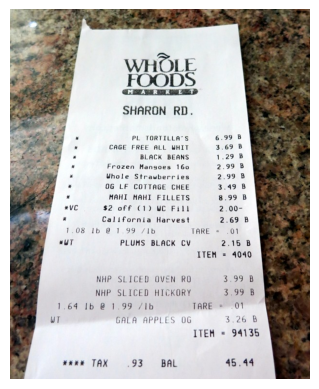

[
    {
        "id": 0,
        "text": "WHOLE FOODS",
        "label": "shop_vendor",
        "box": [
            280,
            80,
            440,
            110
        ],
        "linking": []
    },
    {
        "id": 1,
        "text": "SHARON RD.",
        "label": "location",
        "box": [
            240,
            120,
            480,
            150
        ],
        "linking": []
    },
    {
        "id": 2,
        "text": "PL TORTILLA\u2019S 6.99",
        "label": "item",
        "box": [
            100,
            300,
            640,
            330
        ],
        "linking": []
    },
    {
        "id": 3,
        "text": "CAGE FREE ALL WHIT 3.69",
        "label": "item",
        "box": [
            100,
            350,
            640,
            380
        ],
        "linking": []
    },
    {
        "id": 4,
        "text": "BLACK BEANS 1.29",
        "label": "item",
        "box": [
            100,
            400,
            640,
 

In [34]:
example_row = df_receipts.iloc[2]
image_path, annotation_file_path = example_row["image_path"], example_row["funsd_path"]

img = plt.imread(image_path)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

def get_image_annotations(annotation_file_path): 
    with open(annotation_file_path, "r") as file:
        annotations = json.load(file)
        return annotations

print(json.dumps(get_image_annotation(annotation_file_path), indent=4))

In [35]:
annotations = get_image_annotations(annotation_file_path)
receipt_data = {
    "datetime": None,
    "shop": None,
    "location": None,
    "items": [],
    "total": None
}

for keys in annotations:
    print(keys)

{'id': 0, 'text': 'WHOLE FOODS', 'label': 'shop_vendor', 'box': [280, 80, 440, 110], 'linking': []}
{'id': 1, 'text': 'SHARON RD.', 'label': 'location', 'box': [240, 120, 480, 150], 'linking': []}
{'id': 2, 'text': 'PL TORTILLA’S 6.99', 'label': 'item', 'box': [100, 300, 640, 330], 'linking': []}
{'id': 3, 'text': 'CAGE FREE ALL WHIT 3.69', 'label': 'item', 'box': [100, 350, 640, 380], 'linking': []}
{'id': 4, 'text': 'BLACK BEANS 1.29', 'label': 'item', 'box': [100, 400, 640, 430], 'linking': []}
{'id': 5, 'text': 'Frozen Mangoes 16o 2.99', 'label': 'item', 'box': [100, 450, 640, 480], 'linking': []}
{'id': 6, 'text': 'Whole Strawberries 3.99', 'label': 'item', 'box': [100, 500, 640, 530], 'linking': []}
{'id': 7, 'text': 'OG LF COTTAGE CHEE 3.49', 'label': 'item', 'box': [100, 550, 640, 580], 'linking': []}
{'id': 8, 'text': 'MAHI MAHI FILLETS 8.99', 'label': 'item', 'box': [100, 600, 640, 630], 'linking': []}
{'id': 9, 'text': 'California Harvest 2.69', 'label': 'item', 'box': [100,